In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
file_path = '/content/bdd diabet.csv'  # Updated path to the dataset
df = pd.read_csv(file_path, sep=';')

print(df.head())


                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...     

In [22]:
print(df.columns)


Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [24]:
print( df.describe())

       Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max         49.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          70000.000000   
mean           194.867200            35.051657            160.701657   
std             44.532466             6.803461             48.165547   
min            100.000000            20.000000             80.000000   
25%            163

In [25]:
print(df.isnull().sum())

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

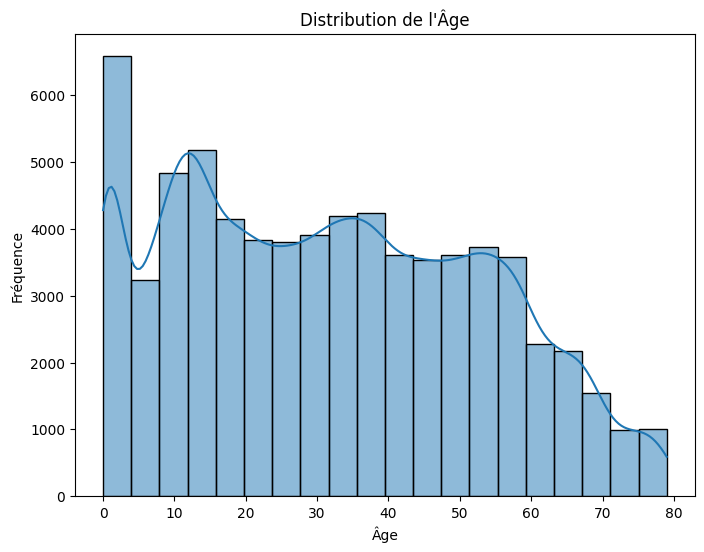

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

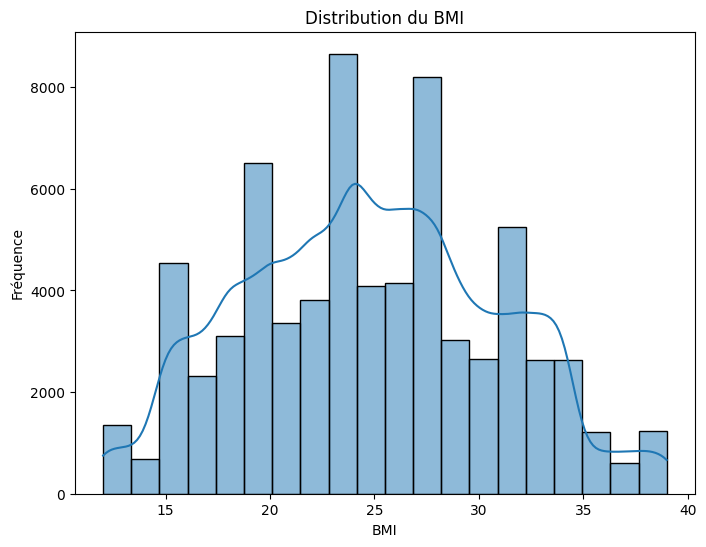

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution du BMI')
plt.xlabel('BMI')
plt.ylabel('Fréquence')
plt.show()

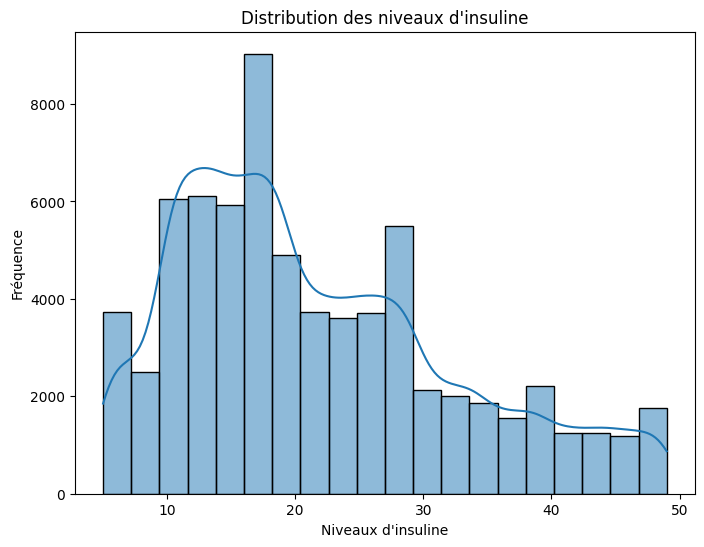

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin Levels'], bins=20, kde=True)
plt.title('Distribution des niveaux d\'insuline')
plt.xlabel('Niveaux d\'insuline')
plt.ylabel('Fréquence')
plt.show()

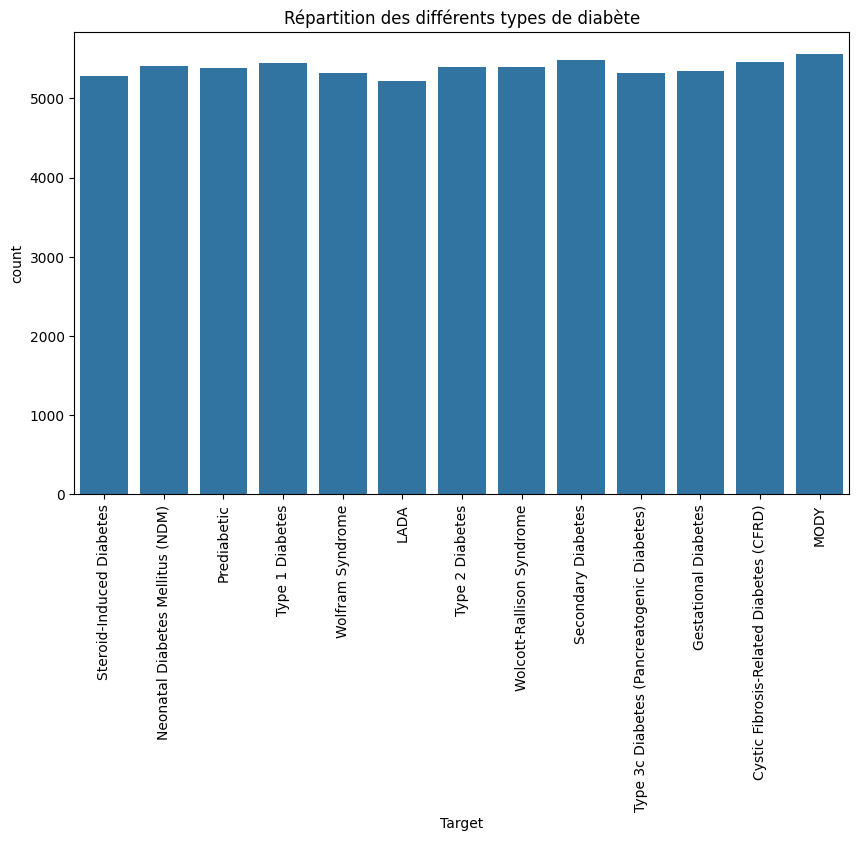

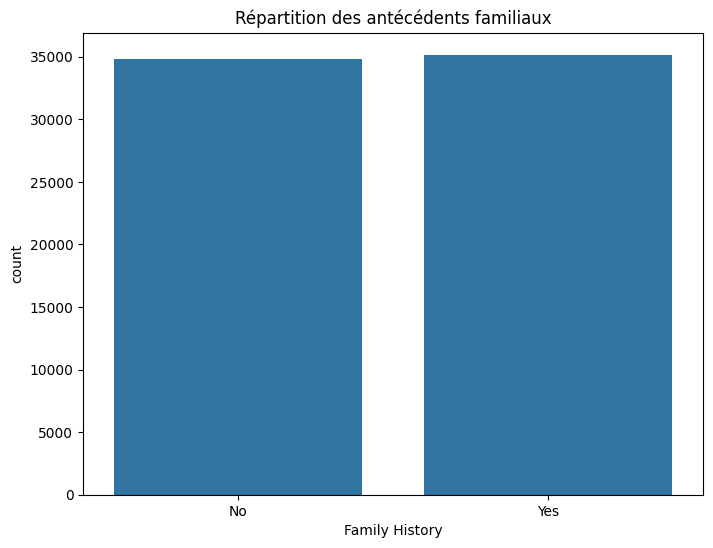

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.xticks(rotation=90)
plt.title('Répartition des différents types de diabète')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Family History', data=df)
plt.title('Répartition des antécédents familiaux')
plt.show()

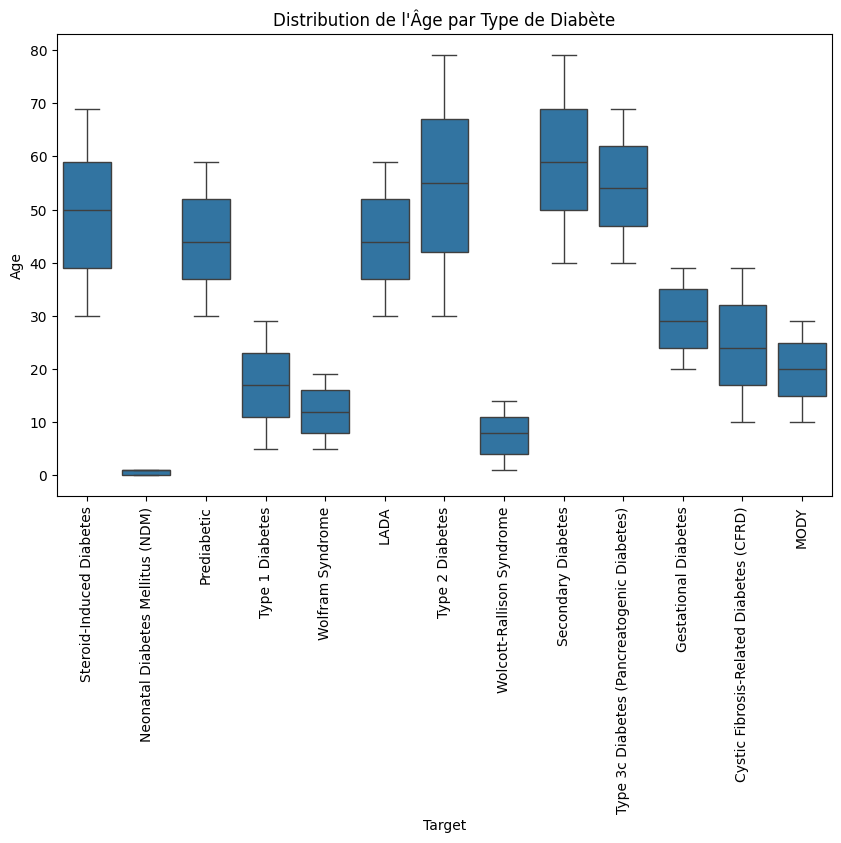

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Distribution de l\'Âge par Type de Diabète')
plt.show()

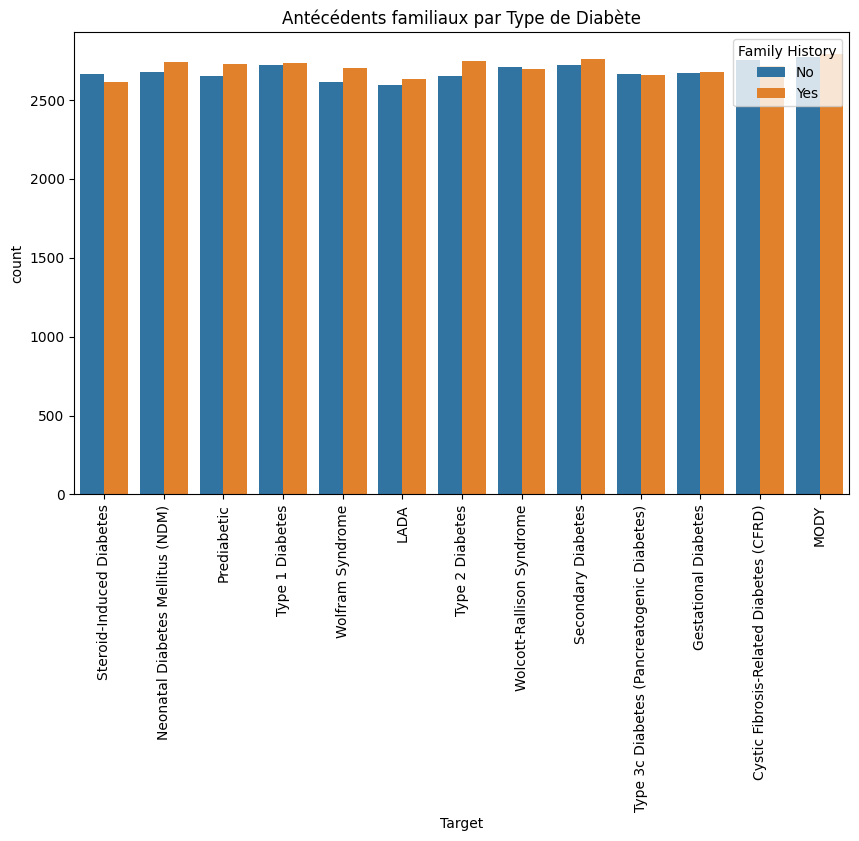

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', hue='Family History', data=df)
plt.xticks(rotation=90)
plt.title('Antécédents familiaux par Type de Diabète')
plt.show()

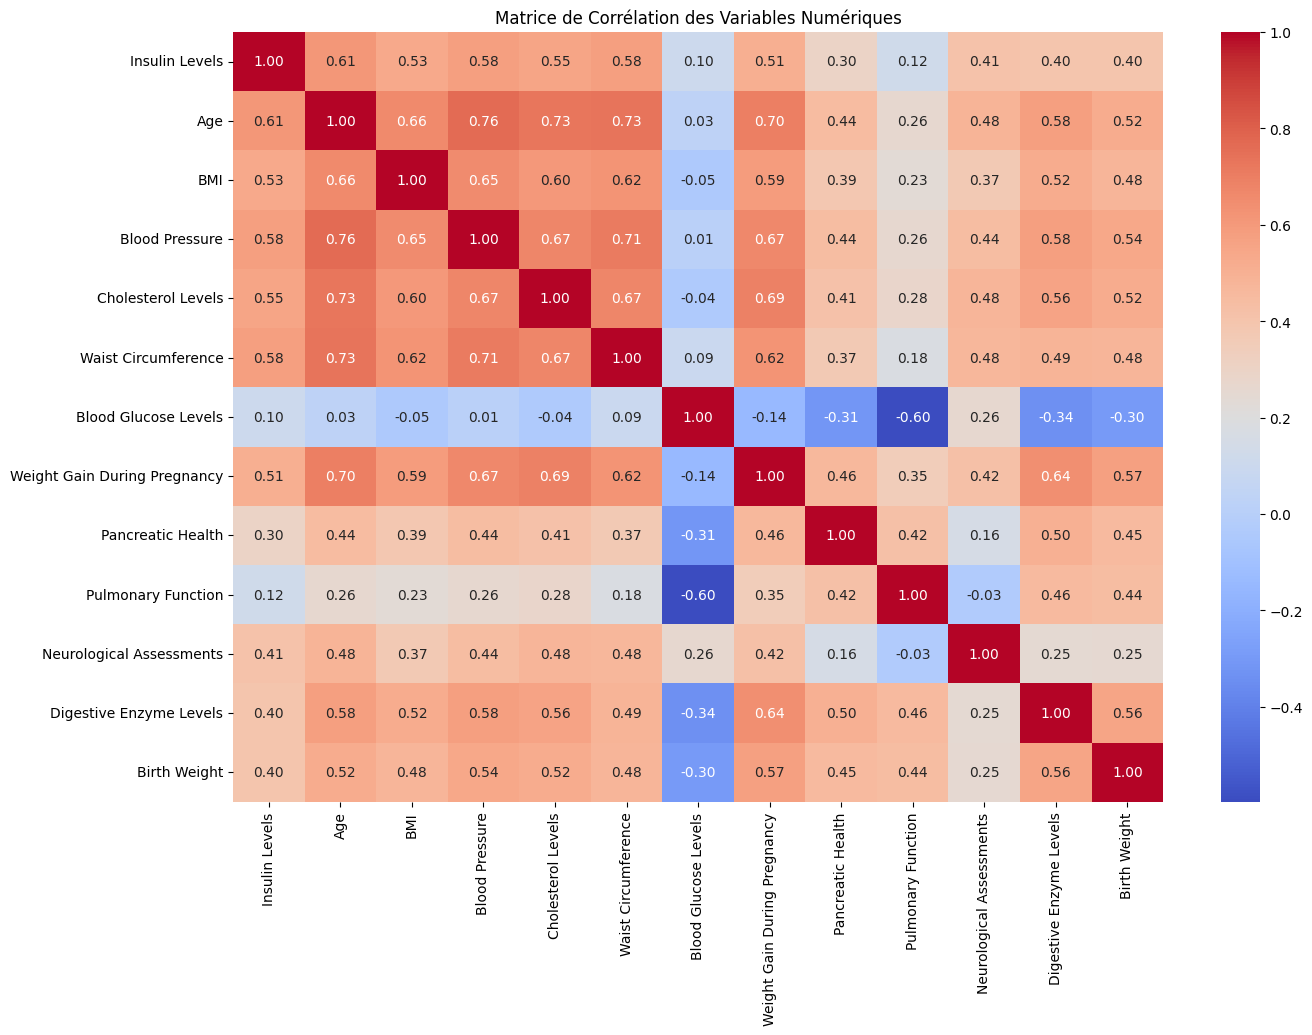

In [32]:
df_numeric = df.select_dtypes(include='number')


corr_matrix = df_numeric.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

In [33]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Valeurs uniques pour la colonne {col} :")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Valeurs uniques pour la colonne Target :
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques pour la colonne Genetic Markers :
Genetic Markers
Positive    35101
Negative    34899
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques pour la colon

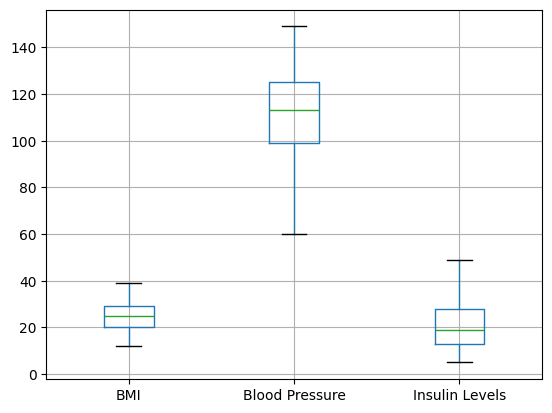

In [34]:
df[['BMI', 'Blood Pressure', 'Insulin Levels']].boxplot()
plt.show()

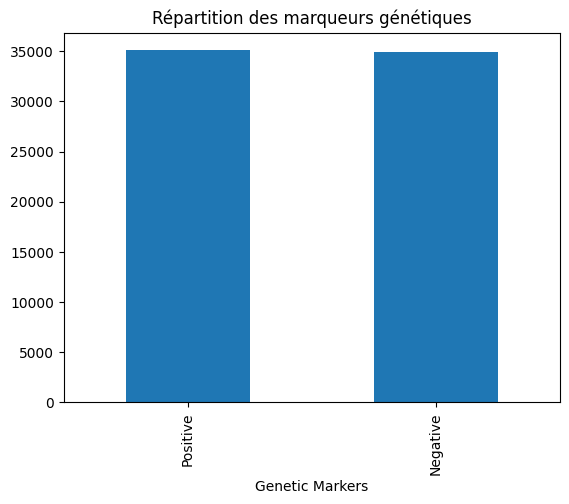

In [35]:
df['Genetic Markers'].value_counts().plot(kind='bar')
plt.title('Répartition des marqueurs génétiques')
plt.show()


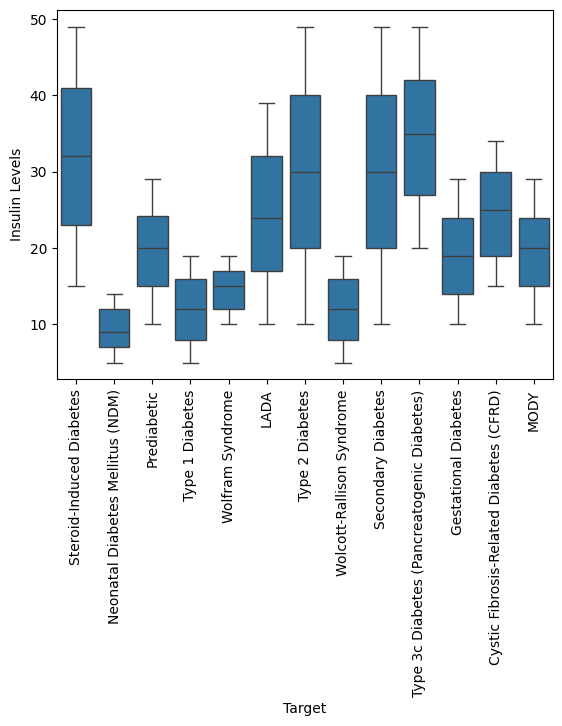

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Target', y='Insulin Levels', data=df)
plt.xticks(rotation=90)
plt.show()

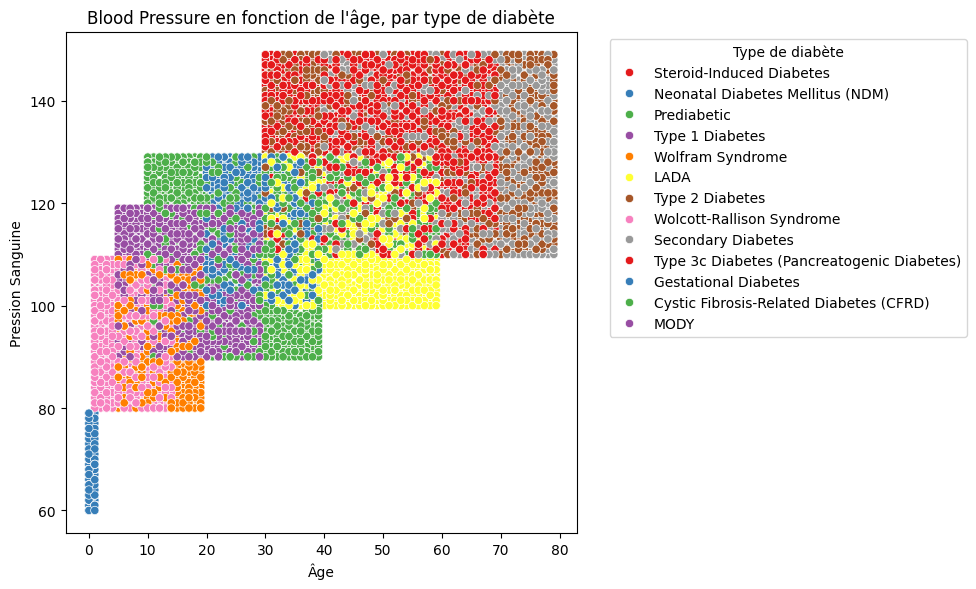

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood Pressure', hue='Target', data=df, palette='Set1')

plt.title('Blood Pressure en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Pression Sanguine')

plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour s'assurer que tout est bien ajusté
plt.show()

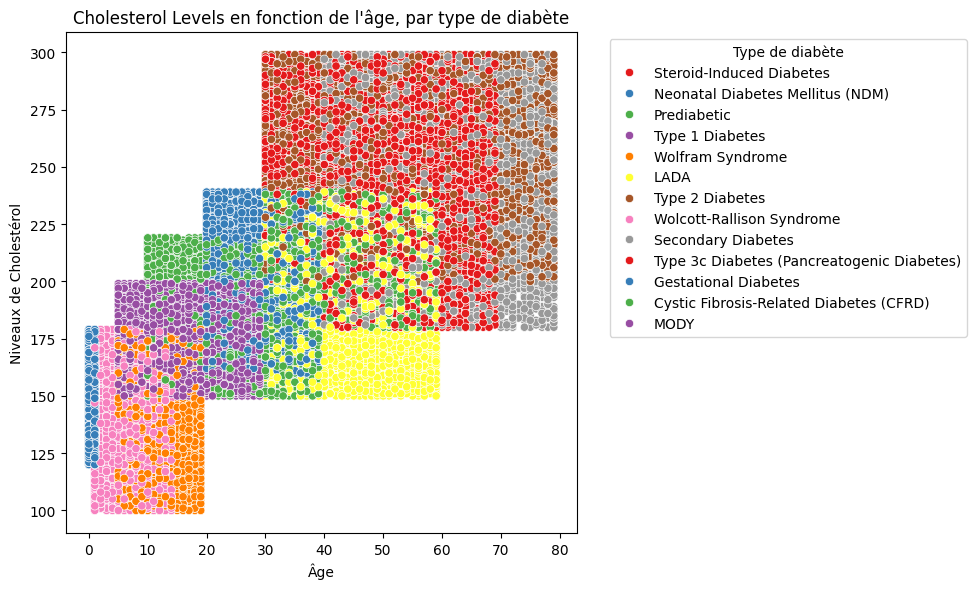

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol Levels', hue='Target', data=df, palette='Set1')

plt.title('Cholesterol Levels en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Niveaux de Cholestérol')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustement pour éviter les chevauchements
plt.show()

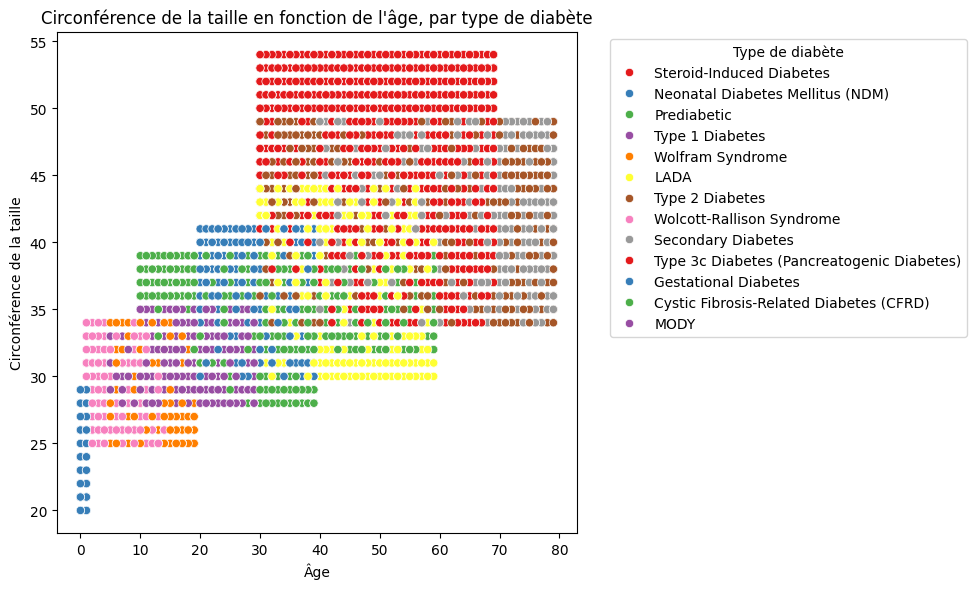

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la circonférence de la taille en fonction de l'âge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Waist Circumference', hue='Target', data=df, palette='Set1')

# Ajouter des titres et des labels
plt.title('Circonférence de la taille en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Circonférence de la taille')
# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour s'assurer que tout est bien ajusté
plt.show()

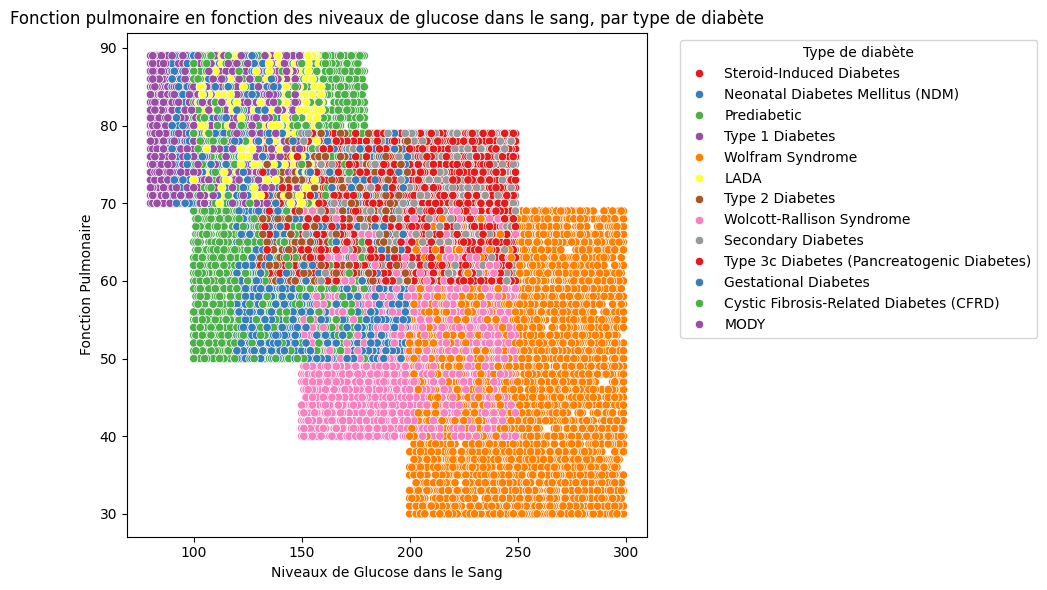

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la fonction pulmonaire en fonction des niveaux de glucose dans le sang
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Blood Glucose Levels', y='Pulmonary Function', hue='Target', data=df, palette='Set1')

# Ajouter des titres et des labels
plt.title('Fonction pulmonaire en fonction des niveaux de glucose dans le sang, par type de diabète')
plt.xlabel('Niveaux de Glucose dans le Sang')
plt.ylabel('Fonction Pulmonaire')
# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajuster pour éviter les chevauchements
plt.show()

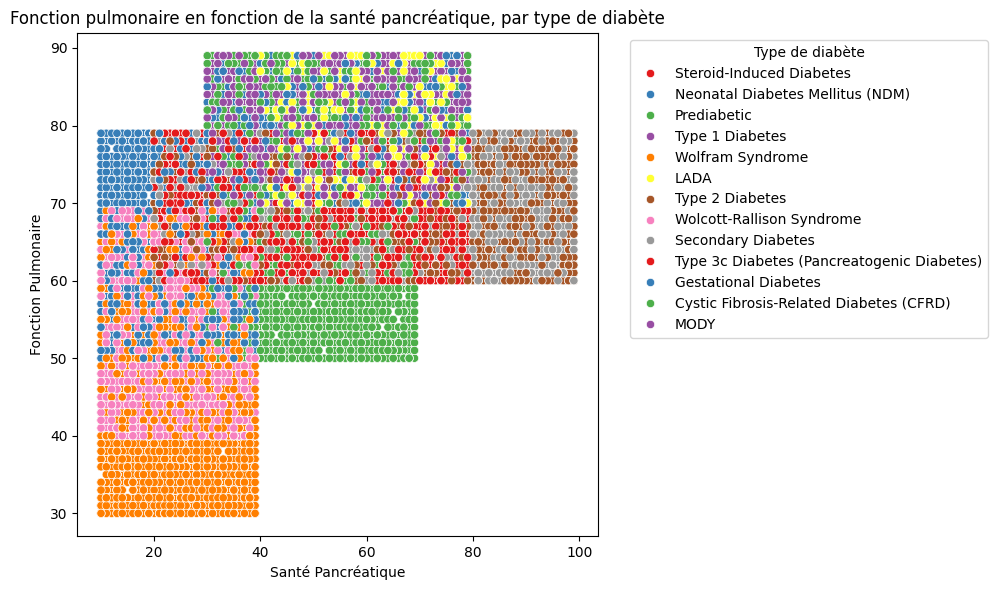

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la fonction pulmonaire en fonction de la santé pancréatique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pancreatic Health', y='Pulmonary Function', hue='Target', data=df, palette='Set1')
# Ajouter des titres et des labels
plt.title('Fonction pulmonaire en fonction de la santé pancréatique, par type de diabète')
plt.xlabel('Santé Pancréatique')
plt.ylabel('Fonction Pulmonaire')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustement pour éviter les chevauchements
plt.show()


In [44]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Chargement des données
df = pd.read_csv('/content/bdd diabet.csv', sep=';') # Corrected file path and added separator
# Affichage des 5 premières lignes du DataFrame
df.head()

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)

# Calcul des valeurs manquantes
nan_percentage = df.isna().sum() / df.count() * 100
nan_count = df.isna().sum()
nan_table = pd.concat([nan_count, nan_percentage], axis=1)
nan_table.columns = ['Count', 'Percentage']
nan_table
# Mapping pour la colonne Target (type de diabète)
target_mapping = {
  'Cystic Fibrosis-Related Diabetes (CFRD)': 0,
  'Gestational Diabetes': 1,
  'LADA': 2,
  'MODY': 3,
  'Neonatal Diabetes Mellitus (NDM)': 4,
  'Prediabetic': 5,
  'Secondary Diabetes': 6,
  'Steroid-Induced Diabetes': 7,
  'Type 1 Diabetes': 8,
  'Type 2 Diabetes': 9,
  'Type 3c Diabetes (Pancreatogenic Diabetes)': 10,
  'Wolcott-Rallison Syndrome': 11,
  'Wolfram Syndrome': 12
  }

# Mapping pour les autres colonnes catégorielles
genetic_markers_mapping = {'Negative': 0, 'Positive': 1}
autoantibodies_mapping = {'Negative': 0, 'Positive': 1}
family_history_mapping = {'No': 0, 'Yes': 1}
environmental_factors_mapping = {'Absent': 0, 'Present': 1}
physical_activity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
dietary_habits_mapping = {'Unhealthy': 0, 'Healthy': 1}
ethnicity_mapping = {'Low Risk': 0, 'High Risk': 1}
socioeconomic_factors_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
smoking_status_mapping = {'Non-Smoker': 0, 'Smoker': 1}
alcohol_consumption_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
glucose_tolerance_test_mapping = {'Normal': 0, 'Abnormal': 1}
history_of_pcos_mapping = {'No': 0, 'Yes': 1}
previous_gestational_diabetes_mapping = {'No': 0, 'Yes': 1}
pregnancy_history_mapping = {'Normal': 0, 'Complications': 1}
cystic_fibrosis_diagnosis_mapping = {'No': 0, 'Yes': 1}
steroid_use_history_mapping = {'No': 0, 'Yes': 1}
genetic_testing_mapping = {'Negative': 0, 'Positive': 1}
liver_function_tests_mapping = {'Normal': 0, 'Abnormal': 1}
urine_test_mapping = {'Normal': 0, 'Protein Present': 1, 'Ketones Present': 2, 'Glucose Present': 3}
early_onset_symptoms_mapping = {'No': 0, 'Yes': 1}
# Application du mapping sur les colonnes du DataFrame
df['Target'] = df['Target'].map(target_mapping)
df['Genetic Markers'] = df['Genetic Markers'].map(genetic_markers_mapping)
df['Autoantibodies'] = df['Autoantibodies'].map(autoantibodies_mapping)
df['Family History'] = df['Family History'].map(family_history_mapping)
df['Environmental Factors'] = df['Environmental Factors'].map(environmental_factors_mapping)
df['Physical Activity'] = df['Physical Activity'].map(physical_activity_mapping)
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_mapping)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df['Socioeconomic Factors'] = df['Socioeconomic Factors'].map(socioeconomic_factors_mapping)
df['Smoking Status'] = df['Smoking Status'].map(smoking_status_mapping)
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(alcohol_consumption_mapping)
df['Glucose Tolerance Test'] = df['Glucose Tolerance Test'].map(glucose_tolerance_test_mapping)
df['History of PCOS'] = df['History of PCOS'].map(history_of_pcos_mapping)
df['Previous Gestational Diabetes'] = df['Previous Gestational Diabetes'].map(previous_gestational_diabetes_mapping)
df['Pregnancy History'] = df['Pregnancy History'].map(pregnancy_history_mapping)
df['Cystic Fibrosis Diagnosis'] = df['Cystic Fibrosis Diagnosis'].map(cystic_fibrosis_diagnosis_mapping)
df['Steroid Use History'] = df['Steroid Use History'].map(steroid_use_history_mapping)
df['Genetic Testing'] = df['Genetic Testing'].map(genetic_testing_mapping)
df['Liver Function Tests'] = df['Liver Function Tests'].map(liver_function_tests_mapping)
df['Urine Test'] = df['Urine Test'].map(urine_test_mapping)
df['Early Onset Symptoms'] = df['Early Onset Symptoms'].map(early_onset_symptoms_mapping)

# Le DataFrame `df` est maintenant prêt avec des variables catégorielles encodées en valeurs numériques

In [46]:
# 1. Séparation des caractéristiques (features) et de la cible (target)
X = df.drop('Target', axis=1)  # Caractéristiques (features)
y = df['Target']  # Cible (Target)

# 2. Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Division en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Normalisation des données (si nécessaire)
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler pour la normalisation
scaler = StandardScaler()

# Normalisation des données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entraînement d'un modèle de machine learning (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
# Initialisation du modèle Random Forest
# Limitation du nombre d'arbres et de la profondeur pour éviter les problèmes de mémoire
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# 5. Évaluation du modèle
from sklearn.metrics import accuracy_score, classification_report
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Rapport de classification détaillé
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# 6. Essayer un autre modèle : SVM
from sklearn.svm import SVC

# Initialisation et entraînement d'un modèle SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
# Prédictions avec le modèle SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Évaluer la précision du modèle SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Précision du modèle SVM : {accuracy_svm * 100:.2f}%')

# 7. Validation croisée pour le modèle Random Forest
from sklearn.model_selection import cross_val_score
# Validation croisée avec Random Forest
# Limitation du nombre de jobs parallèles pour éviter de surcharger la mémoire
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, n_jobs=2)
print(f'Précision moyenne avec validation croisée (Random Forest) : {cv_scores.mean() * 100:.2f}%')

# 8. Optimisation des hyperparamètres (facultatif, GridSearchCV par exemple)
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester pour Random Forest
# Limitation des paramètres pour éviter les problèmes de performance
param_grid = {
    'n_estimators': [50, 100],  # Limitation du nombre d'arbres pour réduire la charge mémoire
    'max_depth': [10, 20],      # Limitation de la profondeur des arbres
    'min_samples_split': [2, 5]
}

# Optimisation des hyperparamètres avec GridSearchCV
# Limitation du nombre de jobs parallèles pour éviter les surcharges
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=2, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
print(f'Meilleurs hyperparamètres : {grid_search.best_params_}')
# Réentraîner le modèle avec les meilleurs paramètres
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Évaluation du modèle optimisé
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Précision du modèle Random Forest optimisé : {accuracy_best_rf * 100:.2f}%')

Précision du modèle : 87.49%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1070
           1       0.88      0.83      0.85      1072
           2       0.92      0.92      0.92      1072
           3       0.91      0.84      0.87      1194
           4       1.00      1.00      1.00      1018
           5       0.89      1.00      0.94      1089
           6       0.79      0.74      0.76      1053
           7       0.82      0.72      0.77      1048
           8       0.84      1.00      0.91      1123
           9       0.96      0.66      0.78      1083
          10       0.68      1.00      0.81      1064
          11       1.00      0.84      0.91      1063
          12       0.86      1.00      0.92      1051

    accuracy                           0.87     14000
   macro avg       0.89      0.88      0.87     14000
weighted avg       0.89      0.87      0.87     14000

Précision du modèle SV